In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
# ! dir

In [3]:
# Read csv file
cov19_vax_us_df = pd.read_csv('../data/covid19_vaccinations_in_us.csv')


In [4]:
cov19_vax_us_df.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
0,United States,984444295,296511.0,381249.0,676728782,203829.0,607682588,235339.0,270227181,81.4,...,56352709,18.0,54974636,19.4,52996306,20.5,23699191,43.3,1997664.0,57512608.0
1,Alaska,2176065,297462.0,394528.0,1328221,181564.0,1177565,213496.0,535718,73.2,...,103619,15.2,100512,16.5,95906,17.4,39311,42.9,NaN,NaN
2,Alabama,12349530,251868.0,323720.0,7018011,143132.0,6526261,171074.0,3193141,65.1,...,376516,8.2,374521,8.9,366925,9.6,202699,23.9,NaN,NaN
3,Arkansas,8373210,277460.0,361280.0,4874091,161511.0,4435479,191378.0,2115165,70.1,...,330572,11.7,325981,12.7,317694,13.7,174653,33.3,NaN,NaN
4,American Samoa,128480,271101.0,410021.0,115281,243250.0,85719,273557.0,46226,95.0,...,576,1.3,573,1.6,568,1.8,199,6.1,NaN,NaN


In [5]:
cov19_vax_us_df.tail()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
59,Vermont,2588940,414902.0,507651.0,1762563,282467.0,1563668,306611.0,623937,95.0,...,213211,35.8,206110,37.4,196740,38.6,86640,69.3,NaN,NaN
60,Washington,25606455,336268.0,430228.0,17723480,232748.0,15765601,264887.0,6517326,85.6,...,1977241,27.6,1907183,29.3,1828199,30.7,720971,59.6,NaN,NaN
61,Wisconsin,16474175,282943.0,361606.0,12444016,213725.0,11264241,247249.0,4386970,75.3,...,1330586,24.2,1298038,26.0,1251270,27.5,600688,59.1,NaN,NaN
62,West Virginia,5515855,307779.0,385029.0,3098571,172897.0,2896775,202207.0,1212338,67.6,...,210085,12.4,208143,13.4,204380,14.3,115583,31.5,NaN,NaN
63,Wyoming,1281755,221466.0,288019.0,854132,147580.0,790769,177691.0,353727,61.1,...,65920,12.1,64919,13.2,63244,14.2,34832,35.1,NaN,NaN


In [6]:
cov19_vax_us_df.shape

(64, 63)

In [7]:
# cov19_vax_us_df.columns

In [8]:
# cov19_vax_us_df.dtypes

In [9]:
cov19_vax_us_df.duplicated().sum()

0

In [10]:
cov19_vax_us_df["Jurisdiction (State/Territory) or Federal Entity"].unique()

array(['United States', 'Alaska', 'Alabama', 'Arkansas', 'American Samoa',
       'Arizona', 'Bureau of Prisons', 'California', 'Colorado',
       'Connecticut', 'District of Columbia', 'Dept of Defense',
       'Delaware', 'Florida', 'Federated States of Micronesia', 'Georgia',
       'Guam', 'Hawaii', 'Iowa', 'Idaho', 'Indian Health Svc', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Marshall Islands', 'Michigan', 'Minnesota',
       'Missouri', 'Northern Mariana Islands', 'Mississippi', 'Montana',
       'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire',
       'New Jersey', 'New Mexico', 'Nevada', 'New York State', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Republic of Palau', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia',
       'Veterans Health', 'Virgin Islands', 'Vermont', 'Washington',
       'Wisconsin', 'West Virgin

In [11]:
# cov19_vax_us_df["Jurisdiction (State/Territory) or Federal Entity"].unique()

In [12]:
# only columns we want to analysize
cols = ['Jurisdiction (State/Territory) or Federal Entity', 'Total doses distributed', 'Total doses administered by jurisdiction', 
                                      'Residents with at least one dose', 'Percent of total pop with at least one dose', 
                                      'Residents 18+ with a completed primary series', 'Percent of 18+ pop with a completed primary series', 
                                      'Residents 65+ with at least one dose', 'Percent of 65+ pop with at least one dose',
                                      'Residents 65+ with a completed primary series', 'Percent of 65+ pop with a completed primary series', 
                                      'Residents 12+ with at least one dose','Percent of 12+ pop with at least one dose', 
                                      'Residents 12+ with a completed primary series', 'Percent of 12+ pop with a completed primary series',
                                      'Residents 5+ with at least one dose', 'Percent of 5+ pop with at least one dose', 
                                      'Residents 5+ with a completed primary series','Percent of 5+ pop with a completed primary series', 
                                      'Children <5 with at least one dose']

col_cov19_vax_us_df = cov19_vax_us_df[cols]
# total_doses_us.loc[:, 'Total doses distributed'] = total_doses_us['Total doses distributed'].map('{:,d}'.format)
# col_cov19_vax_us_df.map('{:,d}'.format)
col_cov19_vax_us_df.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Percent of 18+ pop with a completed primary series,Residents 65+ with at least one dose,Percent of 65+ pop with at least one dose,Residents 65+ with a completed primary series,Percent of 65+ pop with a completed primary series,Residents 12+ with at least one dose,Percent of 12+ pop with at least one dose,Residents 12+ with a completed primary series,Percent of 12+ pop with a completed primary series,Residents 5+ with at least one dose,Percent of 5+ pop with at least one dose,Residents 5+ with a completed primary series,Percent of 5+ pop with a completed primary series,Children <5 with at least one dose
0,United States,984444295,676728782,270227181,81.4,204327579,79.1,58758542,95.0,51708613,94.4,256511884,90.5,219966681,77.6,268021871,85.8,229426936,73.5,1997664.0
1,Alaska,2176065,1328221,535718,73.2,418608,75.9,90909,95.0,81999,89.5,504958,82.9,452885,74.4,530318,77.9,474707,69.8,NaN
2,Alabama,12349530,7018011,3193141,65.1,2416344,63.3,840073,95.0,725159,85.3,3107922,74.2,2554026,61.0,3183544,69.1,2607644,56.6,NaN
3,Arkansas,8373210,4874091,2115165,70.1,1547724,66.8,524198,95.0,440981,84.2,2031772,79.5,1661645,65.0,2104099,74.4,1715538,60.6,NaN
4,American Samoa,128480,115281,46226,95.0,29952,95.0,3314,95.0,2996,91.4,39595,95.0,36395,95.0,46202,95.0,42494,95.0,NaN


In [13]:
# col_cov19_vax_us_df.dtypes

In [14]:
# drop rows that are not part of continental US
col_cov19_vax_us_df = col_cov19_vax_us_df.set_index("Jurisdiction (State/Territory) or Federal Entity")
col_cov19_vax_us_df = col_cov19_vax_us_df.drop(labels = ['American Samoa', 'Bureau of Prisons', 'Dept of Defense','Federated States of Micronesia',
                                                         'Guam', 'Indian Health Svc', 'Marshall Islands', 'Northern Mariana Islands', 'Puerto Rico',
                                                         'Republic of Palau', 'Veterans Health', 'Virgin Islands'])




In [20]:
col_cov19_vax_us_df.shape

(52, 19)

In [21]:
col_cov19_vax_us_df.head(52)

,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Percent of 18+ pop with a completed primary series,Residents 65+ with at least one dose,Percent of 65+ pop with at least one dose,Residents 65+ with a completed primary series,Percent of 65+ pop with a completed primary series,Residents 12+ with at least one dose,Percent of 12+ pop with at least one dose,Residents 12+ with a completed primary series,Percent of 12+ pop with a completed primary series,Residents 5+ with at least one dose,Percent of 5+ pop with at least one dose,Residents 5+ with a completed primary series,Percent of 5+ pop with a completed primary series,Children <5 with at least one dose
Jurisdiction (State/Territory) or Federal Entity,,,,,,,,,,,,,,,,,,,
United States,984444295,676728782,270227181,81.4,204327579,79.1,58758542,95.0,51708613,94.4,256511884,90.5,219966681,77.6,268021871,85.8,229426936,73.5,1997664.0
Alaska,2176065,1328221,535718,73.2,418608,75.9,90909,95.0,81999,89.5,504958,82.9,452885,74.4,530318,77.9,474707,69.8,NaN
Alabama,12349530,7018011,3193141,65.1,2416344,63.3,840073,95.0,725159,85.3,3107922,74.2,2554026,61.0,3183544,69.1,2607644,56.6,NaN
Arkansas,8373210,4874091,2115165,70.1,1547724,66.8,524198,95.0,440981,84.2,2031772,79.5,1661645,65.0,2104099,74.4,1715538,60.6,NaN
Arizona,19959120,14647405,5704677,78.4,4239941,75.2,1348446,95.0,1188267,90.8,5394242,86.9,4596164,74.1,5663049,82.7,4805903,70.2,NaN
California,121107865,88487852,33613401,85.1,25681179,83.9,6058090,95.0,5441414,93.2,31630858,94.0,27956563,83.1,33267856,89.6,29371810,79.1,NaN
Colorado,17769135,13033446,4837792,84.0,3729317,82.9,902546,95.0,818078,95.0,4549073,92.2,4023663,81.5,4776300,88.0,4215139,77.7,NaN
Connecticut,11881825,9040989,3670090,95.0,2602449,91.7,823664,95.0,654355,95.0,3481915,95.0,2816633,90.7,3640198,95.0,2948721,87.1,NaN
District of Columbia,2761525,2137377,836680,95.0,569871,95.0,115713,95.0,95949,95.0,777841,95.0,602569,95.0,820214,95.0,634700,95.0,NaN


In [15]:
# pie chart of Total doses distributed vs Total doses administered by jurisdiction in USA


In [22]:
#drop first index for states and territories only
st_ter_df = col_cov19_vax_us_df.drop( )
st_ter_df

KeyError: '[0] not found in axis'

<Axes: ylabel='Total doses distributed'>

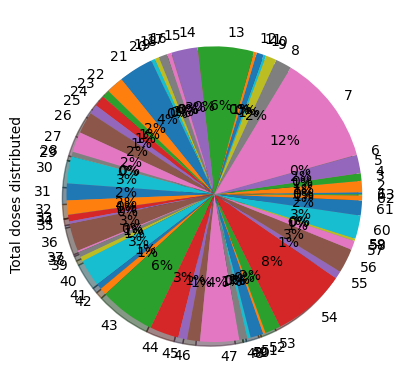

In [ ]:
# pie chart of total doses distributed by jusidiction
# st_ter_df['Total doses distributed'].plot( 
#     kind='pie', y='total doses distributed by jusidiction', autopct='%1.0f%%', shadow=True)

In [ ]:
# #format rows to have commas for better readability 
# ################# this is only working if i RUN-ALL ever time
# col_cov19_vax_us_df.loc[:, 'Total doses distributed'] = col_cov19_vax_us_df['Total doses distributed'].map('{:,d}'.format)
# col_cov19_vax_us_df.loc[:, 'Total doses administered by jurisdiction'] = col_cov19_vax_us_df['Total doses administered by jurisdiction'].map('{:,d}'.format)

# # col_cov19_vax_us_df.loc[:, 'Residents with at least one dose'] = col_cov19_vax_us_df['Residents with at least one dose'].map('{:,d}'.format)
# col_cov19_vax_us_df.loc[:, 'Residents 18+ with a completed primary series'] = col_cov19_vax_us_df['Residents 18+ with a completed primary series'].map('{:,d}'.format)
# ########################## Residents 18+ with at least one dose === Residents with at least one dose 
# # ?????????????????????????????????????????????????????????????????????????????????

# col_cov19_vax_us_df.loc[:, 'Residents 65+ with at least one dose'] = col_cov19_vax_us_df['Residents 65+ with at least one dose'].map('{:,d}'.format)
# col_cov19_vax_us_df.loc[:, 'Residents 65+ with a completed primary series'] = col_cov19_vax_us_df['Residents 65+ with a completed primary series'].map('{:,d}'.format)

# col_cov19_vax_us_df.loc[:, 'Residents 12+ with at least one dose'] = col_cov19_vax_us_df['Residents 12+ with at least one dose'].map('{:,d}'.format)
# col_cov19_vax_us_df.loc[:, 'Residents 12+ with a completed primary series'] = col_cov19_vax_us_df['Residents 12+ with a completed primary series'].map('{:,d}'.format)

# # col_cov19_vax_us_df.loc[:, 'Residents 5+ with at least one dose '] = col_cov19_vax_us_df['Residents 5+ with at least one dose '].map('{:,d}'.format)
# col_cov19_vax_us_df.loc[:, 'Residents 5+ with a completed primary series'] = col_cov19_vax_us_df['Residents 5+ with a completed primary series'].map('{:,d}'.format)
# ########################## Residents 5+ with at least one dose CHECK DF
# ?????????????????????????????????????????????????????????????????????????????????


In [ ]:
# total doses distrubuted in US/ dose per jusidiction
# total_doses_us = col_cov19_vax_us_df[["Jurisdiction (State/Territory) or Federal Entity",'Total doses distributed', 'Total doses administered by jurisdiction' ]]
# total_doses_us.head()

Text(0.5, 1.0, 'Total doses distributed per State/Jusidiction')

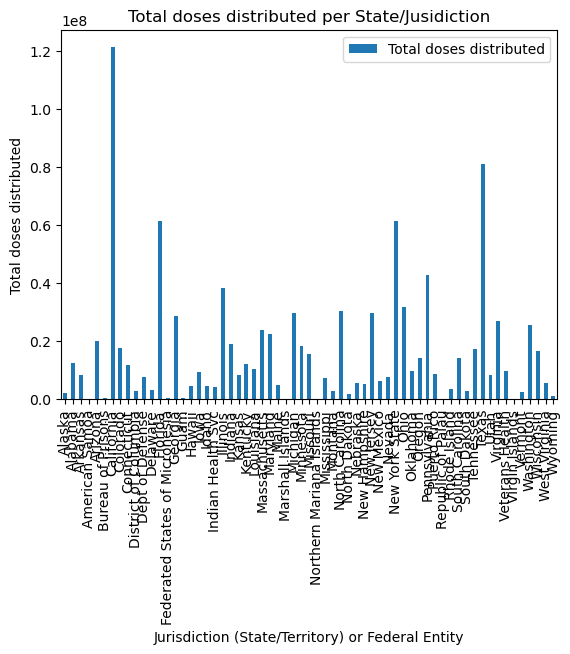

In [ ]:
# bar chart of total doses/jurisdiciton for state / terr only
st_ter_df.plot(kind = 'bar', x = 'Jurisdiction (State/Territory) or Federal Entity', y = 'Total doses distributed')
plt.xlabel('Jurisdiction (State/Territory) or Federal Entity')
plt.ylabel('Total doses distributed')
plt.title('Total doses distributed per State/Jusidiction')

In [ ]:
# 65+ residents df of states/terr only
sixfive_plus_df = st_ter_df[["Jurisdiction (State/Territory) or Federal Entity", 'Total doses distributed',
                                       'Residents 65+ with at least one dose', 'Residents 65+ with a completed primary series']]
sixfive_plus_df.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Residents 65+ with at least one dose,Residents 65+ with a completed primary series
1,Alaska,2176065,90909,81999
2,Alabama,12349530,840073,725159
3,Arkansas,8373210,524198,440981
4,American Samoa,128480,3314,2996
5,Arizona,19959120,1348446,1188267


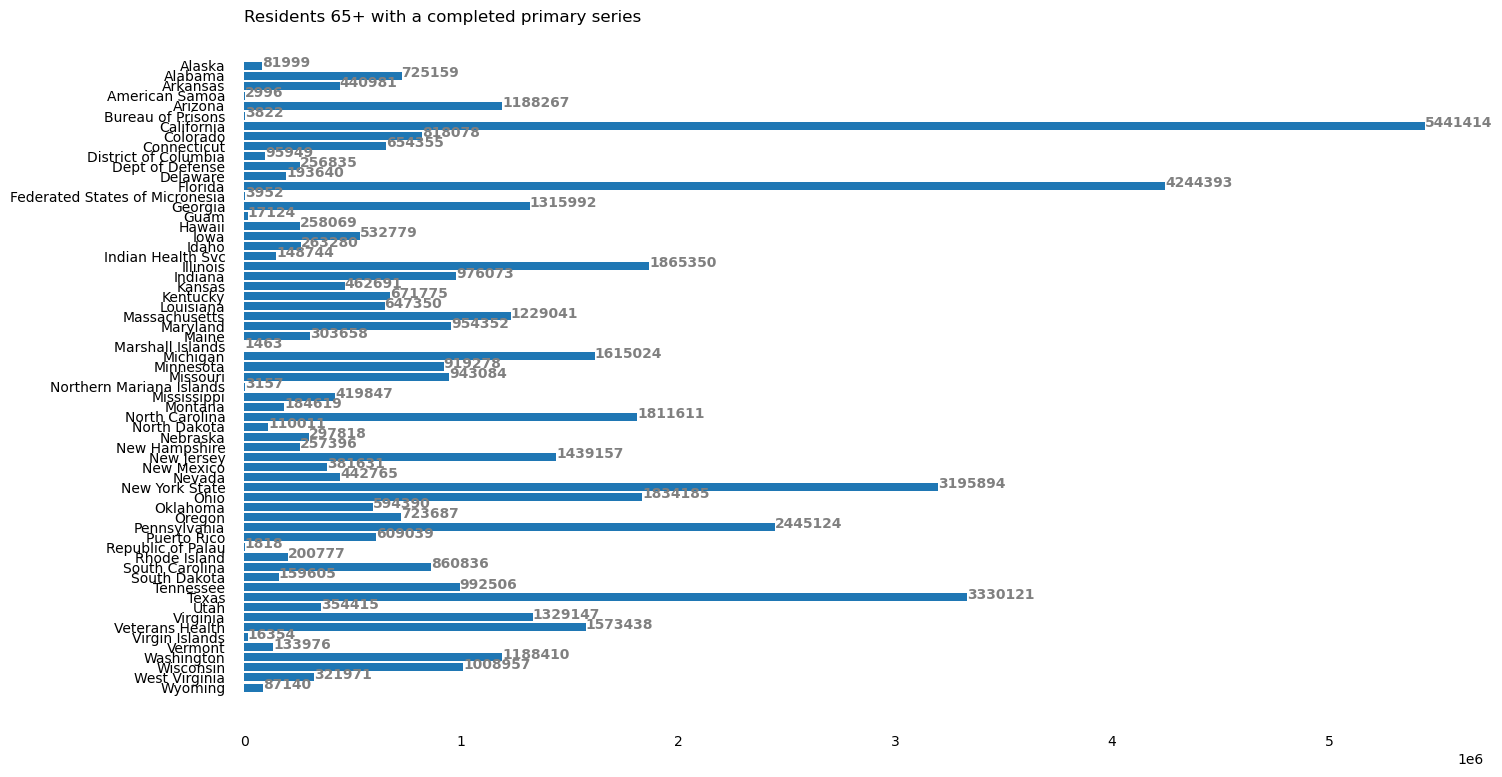

<Figure size 640x480 with 0 Axes>

In [ ]:
jus = st_ter_df['Jurisdiction (State/Territory) or Federal Entity']
res_sixfive_com = st_ter_df['Residents 65+ with a completed primary series']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(jus, res_sixfive_com)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
  
# Show top values 
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Residents 65+ with a completed primary series',
             loc ='left', )
 
# Show Plot
plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Total doses distributed per Jusidiction')

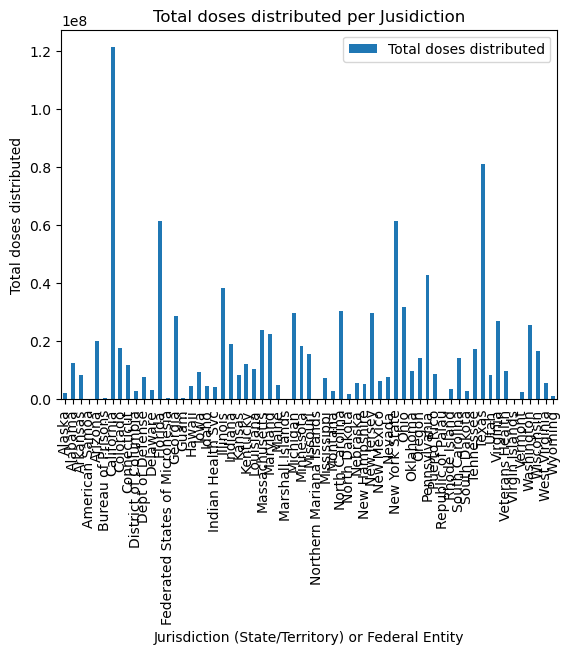

In [ ]:
# bar chart of 65+ jurisdiciton
sixfive_plus_df.plot(kind = 'bar', x = 'Jurisdiction (State/Territory) or Federal Entity', y = 'Total doses distributed')
plt.xlabel('Jurisdiction (State/Territory) or Federal Entity')
plt.ylabel('Total doses distributed')
plt.title('Total doses distributed per Jusidiction')

In [ ]:
# 18+ residents df
#???????????????????????????????????????????????????????????

In [ ]:
# 12+ residents df stats
twelve_plus_df = st_ter_df[["Jurisdiction (State/Territory) or Federal Entity", 'Total doses distributed',
                                      'Residents 12+ with at least one dose', "Residents 12+ with a completed primary series" ]]
twelve_plus_df.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Residents 12+ with at least one dose,Residents 12+ with a completed primary series
1,Alaska,2176065,504958,452885
2,Alabama,12349530,3107922,2554026
3,Arkansas,8373210,2031772,1661645
4,American Samoa,128480,39595,36395
5,Arizona,19959120,5394242,4596164


In [ ]:
# 5+ residents df states
five_plus_df = st_ter_df[["Jurisdiction (State/Territory) or Federal Entity", 'Total doses distributed',
                                    'Residents 5+ with at least one dose', "Residents 5+ with a completed primary series" ]]
five_plus_df.head()


,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Residents 5+ with at least one dose,Residents 5+ with a completed primary series
1,Alaska,2176065,530318,474707
2,Alabama,12349530,3183544,2607644
3,Arkansas,8373210,2104099,1715538
4,American Samoa,128480,46202,42494
5,Arizona,19959120,5663049,4805903
